In [10]:
import pyodbc
import time
import matplotlib.pyplot as plt

In [11]:
# Connection to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                      'SERVER=DESKTOP-RHT316C\SQL;'
                      'DATABASE=UniversityWithIndex;'
                      'UID=DESKTOP-RHT316C\PRECISION;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [12]:
# Queries to execute
queries = {
    "Select all students": "SELECT * FROM Student",
    "Select students with department": "SELECT * FROM Student WHERE DepartmentID = 1",
    "Join students and courses": """
        SELECT S.StudentID, S.FirstName, C.CourseName
        FROM Student S
        JOIN Course C ON S.DepartmentID = C.DepartmentID
    """,
    "Aggregate by department": """
        SELECT DepartmentID, COUNT(*) AS StudentCount
        FROM Student
        GROUP BY DepartmentID
    """,
    "Complex query with joins and aggregation": """
        SELECT D.DepartmentName, COUNT(S.StudentID) AS StudentCount, AVG(C.CourseID) AS AvgCourseID
        FROM Student S
        JOIN Department D ON S.DepartmentID = D.DepartmentID
        JOIN Course C ON S.DepartmentID = C.DepartmentID
        GROUP BY D.DepartmentName
    """
}

In [13]:
# Function to run a query and measure execution time
def run_query(query):
    start_time = time.time()
    cursor.execute(query)
    cursor.fetchall()  # Fetch all results to ensure the query is fully executed
    end_time = time.time()
    return end_time - start_time

# Run each query and capture execution times
execution_times = []
for query_name, query in queries.items():
    exec_time = run_query(query)
    execution_times.append((query_name, exec_time))
    print(f"Query: {query_name}, Execution Time: {exec_time:.4f} seconds")

# Close the cursor and connection
cursor.close()
conn.close()

Query: Select all students, Execution Time: 0.0401 seconds
Query: Select students with department, Execution Time: 0.0054 seconds
Query: Join students and courses, Execution Time: 0.0968 seconds
Query: Aggregate by department, Execution Time: 0.0035 seconds
Query: Complex query with joins and aggregation, Execution Time: 0.0316 seconds


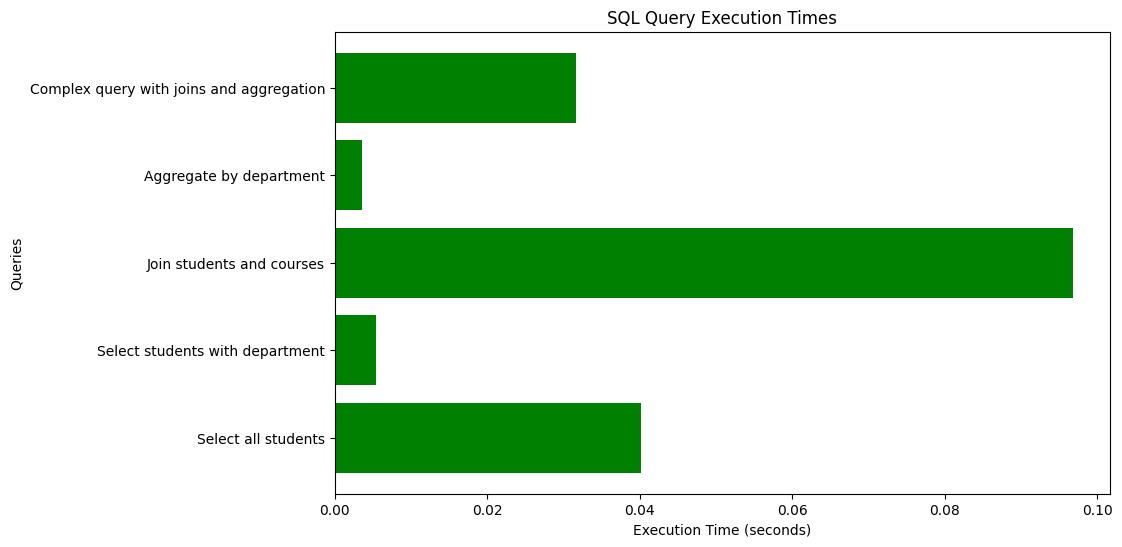

In [14]:
# Plotting the results using matplotlib
query_names = [qt[0] for qt in execution_times]
times = [qt[1] for qt in execution_times]

plt.figure(figsize=(10, 6))
plt.barh(query_names, times, color='green')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Queries')
plt.title('SQL Query Execution Times')
plt.show()